In [1]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-1: Make a slit

**Your Goal:** Create a quantum circuit that models a particle (qubit) passing through two slits, achieving a superposition of being in the $|0\rangle$ (lower slit) and $|1\rangle$ (upper slit) states.

Let's define the upper slit as the 
$|1\rangle$ state of a qubit and the lower slit as the $|0\rangle$ state. Implement a quantum circuit where a qubit, initially in $|0\rangle$, passes through the slits in a superposition of $|0\rangle$ and $|1\rangle$ using the [Hadamard gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.HGate). Draw your circuit.

**Hint**: It can be beneficial for clarity to assign specific names to `QuantumRegister` (e.g., `name='q'`) and `ClassicalRegister` (e.g., `name='c_screen'`) when interpreting measurement data.

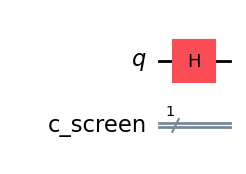

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here

double_slit.h(0)

# end of your code
double_slit.draw('mpl')

In [3]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-2: Make a screen

**Your Goal:** Extend the previous circuit to model the screen where interference occurs. Specifically, implement the center of the screen where no phase difference is introduced, and then measure the qubit.

Now, implement the screen where the two superposed quantum states create an interference pattern by adding a gate. First, let's implement the center of the screen, where the two beams combine with no phase difference (resulting in the $|0\rangle$ state). Then measure the qubit from `qr` and store the result in `c_screen`.

**Hint**: You can use the Hadamard gate again.
</div>

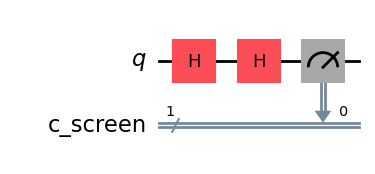

In [4]:
# your code here
double_slit.h(0)
double_slit.measure(qubit=0,cbit=0)
# end of your code
double_slit.draw('mpl')

In [5]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Let's check the execution result. Assuming the screen detects the qubit in the $|0\rangle$ state, the following code runs the circuit on an ideal simulator. A probability of 1 means 100%.

<div class="alert alert-block alert-info">
<b>Note on Retrieving Measurement Results with SamplerV2</b> 

When using *SamplerV2* in Qiskit, how you retrieve measurement counts depends on how you've set up your classical registers and measurements:

1.  Named Classical Register in *QuantumCircuit*:
    If you define your circuit with a named classical register, e.g., *cr = ClassicalRegister(1, name='my_results')* and *qc = QuantumCircuit(qr, cr)*, and then measure to it *qc.measure(qr[0], cr[0])*, you access the counts using that name:

    
    ```python
    # result = job.result()
    # counts = result[0].data.my_results.get_counts()
    ```
    
    In our double-slit circuit, we used *cr = ClassicalRegister(1, name='c_screen')*, so we will use *result[0].data.c_screen.get_counts()*.

3.  measure_all():
    If you use *qc.measure_all()*, Qiskit automatically adds classical bits and names the output data field `meas`:

    
    ```python
    # qc.measure_all()
    # ...
    # counts = result[0].data.meas.get_counts()
    ```

5.  Implicit Classical Bits (No Named Register in *QuantumCircuit*):
    If you create a circuit like *qc = QuantumCircuit(1, 1)* (1 qubit, 1 classical bit) or *qc = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))* without naming the classical register in its constructor, and then use *qc.measure(0, 0)*, the *SamplerV2* might store results under a default name (often *c*, or based on the classical bit indices like *c0*).
    For *qc = QuantumCircuit(1,1)* and *qc.measure(0,0)*, the output might be accessed as follows:

    ```python 
     # counts = result[0].data.c0.get_counts() # If single bit named c0, the indice can vary. You can see the actual indices when you plot your circuit.
    ```
</div>

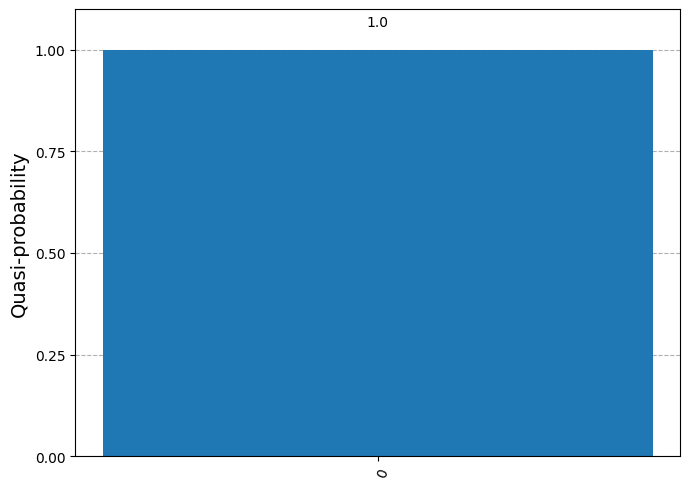

In [6]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-3: Make a difference

**Your Goal:** Modify the double-slit circuit to introduce a phase difference between the two paths (slits) and observe its effect on the measurement outcome at the screen.

Now, let's implement another part of the screen. The path difference between the two beams is implemented as a phase difference between $|0\rangle$ and $|1\rangle$. Apply a phase of $\pi/2$ only to the $|1\rangle$ state of the superposed quantum state and observe the measurement results. (Hint: Use a gate that applies a phase to the $|1\rangle$ state. The [P gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.PhaseGate) and the [S gate](https://quantum.cloud.ibm.com/docs//api/qiskit/qiskit.circuit.library.SGate) are representative examples.)
</div>

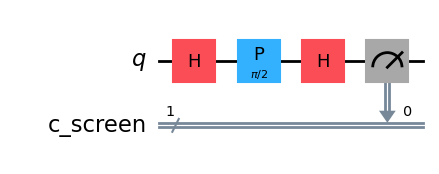

In [7]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here
double_slit_with_difference.p(np.pi/2,0)

#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [8]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


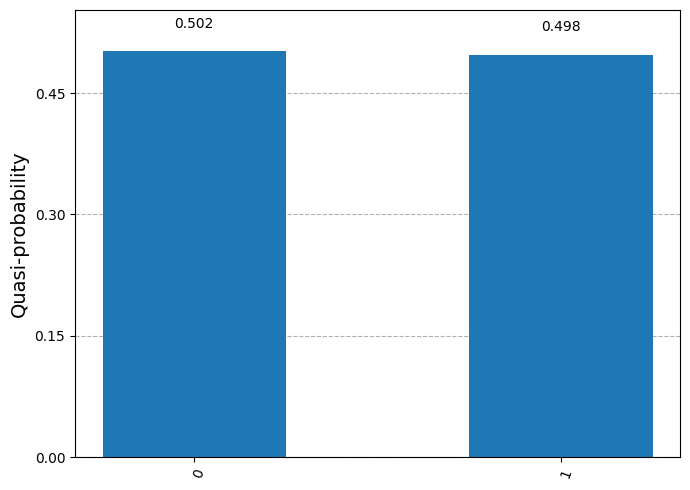

In [9]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-4: Beautiful Fringes

**Your Goal:** Create a parameterized quantum circuit where the phase difference $\phi$ can be varied, allowing you to simulate and visualize the complete interference fringe pattern.

Qiskit allows [using `Parameters` in quantum circuits](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.Parameter). We'll use this with the `Sampler` to observe interference fringes.

Define a parameterized quantum circuit for the double-slit experiment with a variable parameter $\phi$. A common structure is H-gate, then $P(\phi)$, then another H-gate, before measurement. Measure `q` and save to `c_screen`.
</div>

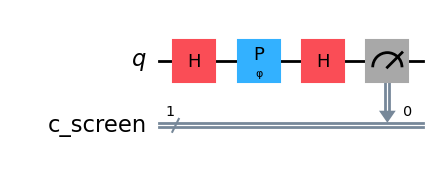

In [10]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here
double_slit_fringe.h(0)
double_slit_fringe.p(φ,0)
double_slit_fringe.h(0)
double_slit_fringe.measure(qr[0],cr[0])

#end of your code

double_slit_fringe.draw('mpl')

In [11]:
# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Excellent! Now, let's use this parameterized circuit to plot the fringe pattern using matplotlib's heat map. The code below generates 100 phase values, runs the circuits (1000 shots each) via `Sampler`, stores the probability of measuring $|0\rangle$, and plots the heat map.

<div class="alert alert-block alert-warning">
<b>Resource limit</b>

When running the code below on an actual backend, increasing the number of parameters or shots consumes more QPU time than might be expected. The current configuration (100 parameterized circuits + 1000 shots) uses less than 1 minute of QPU time, so please try to maintain these settings if possible.

</div>

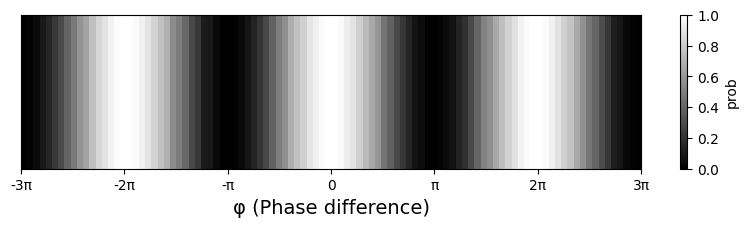

In [12]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise 2: Is the cat happy or grumpy?</b>

**Your Goal:** Create a quantum circuit that prepares a qubit in a superposition state using an $R_X(\theta)$ gate, then simulate a single measurement to determine if the "cat" (represented by the qubit state) is "happy" ($|0\rangle$) or "grumpy" ($|1\rangle$).

Complete the Python code below using the [Rotational X gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.RXGate) with $\theta \in [0, 2\pi]$ to prepare a qubit in various superposition states. Then, measure once to see if the cat is happy ($|0\rangle$) or grumpy ($|1\rangle$). $\theta$ will be given to you by the slider.
</div>

In [14]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here
    qc.rx(theta,0)

    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [15]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [16]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

## Double-slit with Measurement

<div class="alert alert-block alert-success">
<b>Exercise 3: Double-slit with a path detector</b>

**Your Goal:** Construct a double-slit circuit that includes an intermediate measurement acting as a "which-path" detector. This will allow you to observe how acquiring information about the particle's path affects the final interference pattern.

Modify the double-slit circuit to include a "which-path" detector (a measurement after the first H-gate).

Setup:
* `qr`: 1 qubit (`'q'`).
* `cr1`: 1 classical bit (`'c_detector'`) for path detection.
* `cr2`: 1 classical bit (`'c_screen'`) for final measurement.
* `φ`: A `Parameter` for the phase gate.

**Hint**: Your circuit will have two measurements.
</div>

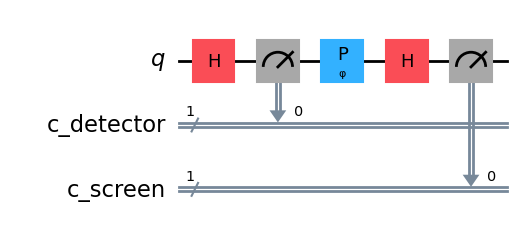

In [17]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

#your code here
double_slit_with_detector.h(0)
double_slit_with_detector.measure(qr[0],cr1)
double_slit_with_detector.p(φ,0)
double_slit_with_detector.h(0)


double_slit_with_detector.measure(qr[0],cr2)

#end of your code

double_slit_with_detector.draw('mpl')

In [18]:
# Submit your answer using the following code
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


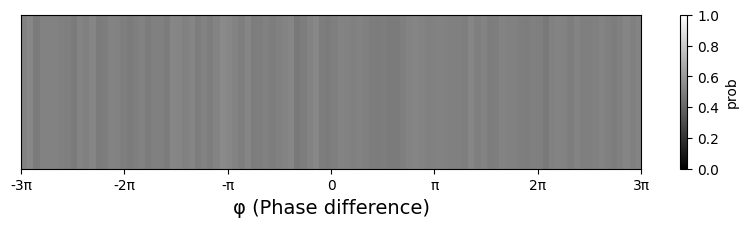

In [20]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

### Qiskit Implementation: Building the Quantum Circuit

<div class="alert alert-block alert-success">
<b>Exercise 4: Quantum Circuit for CHSH Game</b>

**Your Goal:** Define a function `create_chsh_circuit(x, y)` by constructing the quantum circuit that Alice and Bob will use for their quantum strategy in the CHSH game. This involves preparing an entangled Bell state and then applying measurement basis rotations based on their respective inputs.

**Tasks:**
* **Task 1:** Create the Bell state $(|00\rangle + |11\rangle) / \sqrt{2}$.
* **Task 2:** Implement Bob's rotation based on his input `y`.
</div>

In [21]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    # ---- TODO : Task 1 ---
    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2).
    qc.h(0)
    qc.cx(0,1)
    # --- End of TODO ---
    qc.barrier()
    # Step 2a: Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement

    ##  --- TODO: Task 2 ----
    # Step 2b: Bob's measurement basis
    if y == 0:
        qc.ry(-np.pi/4,1)
    elif y==1:
        qc.ry(np.pi/4,1)

    
    # --- End of TODO ---
    qc.barrier()
    
    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob) -> 'ba' format

    return qc

In [22]:
# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


### Analysis: Did They Beat the Classical Limit?

Now, the moment of truth! We need to analyze the simulation results (`counts_list`) to calculate the average win probability.

**Recap:**
*   **Win Condition:** `a XOR b == x AND y`
*   **Output Format:** Counts are for `'ba'` strings.
    *   `a XOR b = 0` for outcomes `'00'` (`b=0, a=0`) and `'11'` (`b=1, a=1`).
    *   `a XOR b = 1` for outcomes `'01'` (`b=0, a=1`) and `'10'` (`b=1, a=0`).


<div class="alert alert-block alert-success">
<b>Exercise 5: Analyze Circuit for CHSH Game</b>

**Your Goal:** Calculate the win probability for Alice and Bob for each input case (`x`, `y`) based on the simulation results, and then determine their overall average win probability using the quantum strategy.

**Tasks:**
* **Task 1:** Determine the target `a XOR b` value for a win, given `x` and `y`.
* **Task 2:** Count shots (`wins_for_this_case`) satisfying the win condition for the current (`x`, `y`).
</div>

Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


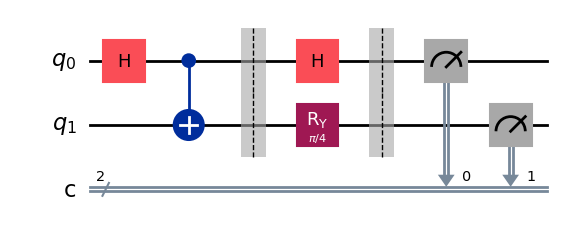

In [24]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 421, '01': 86, '10': 79, '11': 438}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 408, '01': 79, '10': 95, '11': 442}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 432, '01': 65, '10': 65, '11': 462}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 72, '01': 421, '10': 450, '11': 81}

Plotting results...


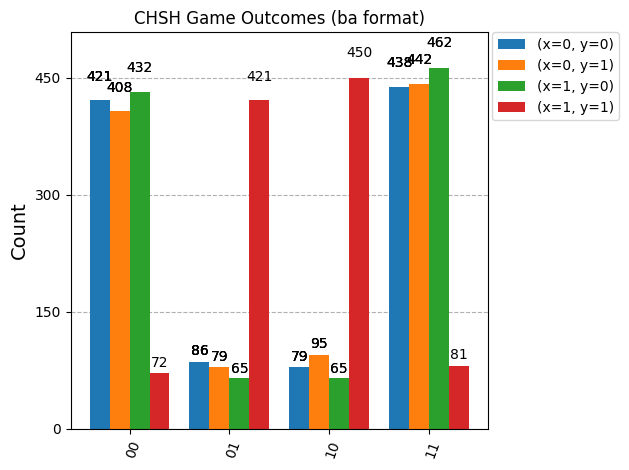

In [26]:
# AerSimulator (if not already defined)
# backend = AerSimulator()
# Pass manager (if not already defined)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [27]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # Target (a XOR b) value for winning
    target_xor_result=x&y



    # --- End of TODO --

    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Calculate the total number of shots that satisfy the winning condition determined above. Check the 'target_xor_result'
    for outcome,count in counts.items():
        a=int(outcome[0])
        b=int(outcome[1])
        if a^b==target_xor_result:
            wins_for_this_case+=count


    # --- End of TODO --

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # Could be noise or minor error
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8389
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8301
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8730
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8506

--- Overall Performance ---
Experimental Average Win Probability: 0.8481
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8481) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


### Building the Teleportation Circuit in Qiskit


<div class="alert alert-block alert-success">
<b>Exercise 6: Quantum Teleportation</b>

**Your Goal:** Construct the complete quantum circuit for teleporting an unknown quantum state from Alice's message qubit to Bob's qubit, utilizing an entangled Bell pair and mid-circuit measurements with conditional operation.

**Tasks:**
* **Step 1:** Create the shared entangled Bell pair $(|00\rangle + |11\rangle) / \sqrt{2}$ between `q1` and `q2`.
* **Step 2:** Implement Alice's Bell measurement gates (before actual measurement).
* **Step 3:** Implement Bob's conditional correction gates based on Alice's measurement results.
</div>

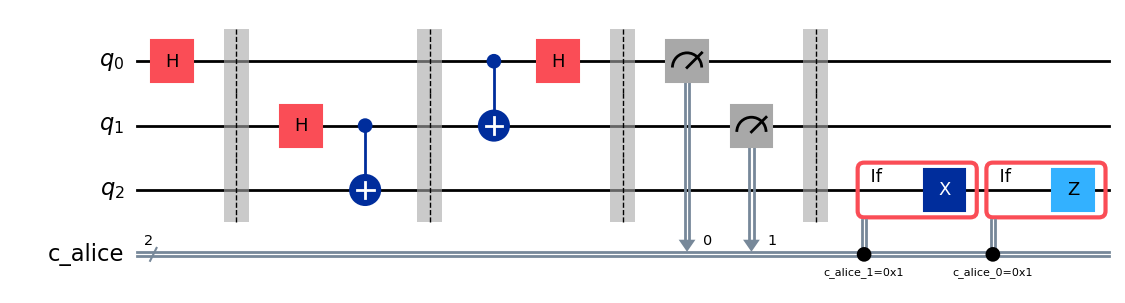

In [32]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.controlflow import IfElseOp

# Define quantum and classical registers
qr_tele=QuantumRegister(3,name="q")
cr_alice_tele=ClassicalRegister(2,name="c_alice")

teleport_qc=QuantumCircuit(qr_tele,cr_alice_tele,name="Teleportation")

teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1],qr_tele[2])
teleport_qc.barrier()

teleport_qc.cx(qr_tele[0],qr_tele[1])
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

teleport_qc.measure(qr_tele[0],cr_alice_tele[0])
teleport_qc.measure(qr_tele[1],cr_alice_tele[1])
teleport_qc.barrier()

with teleport_qc.if_test((cr_alice_tele[1],1)):
    teleport_qc.x(qr_tele[2])
with teleport_qc.if_test((cr_alice_tele[0],1)):
    teleport_qc.z(qr_tele[2])

teleport_qc.draw(output="mpl")

In [33]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


You are a gadha because in the initial circuit diagram there was an extra $X$ gate that I tested for getting the $\ket{-}$ state in the output, as:
$$
H \ket{1}=\ket{-}
$$

If you had excluded the extra $X$ gate at the start, the code was working properly.

### Simulation and Verification

How do we verify that the teleportation worked? We can't directly 'see' the state of Bob's qubit after the protocol. However, since we *prepared* Alice's initial state `|ψ⟩` (we chose `|+>`), we can use a special type of simulation to check if Bob's qubit `q2` ended up in that same state.

We'll use `AerSimulator` with `save_statevector` to check if Bob's qubit `q2` ends up in Alice's original state (`|+>`). This simulator calculates the final quantum state vector.

<div class="alert alert-block alert-success">
<b>Exercise 7 - No Grading: Analyze result of Quantum Teleportation</b>

**Your Goal:** Verify the successful teleportation of Alice's quantum state to Bob's qubit by simulating the circuit and visualizing the final state of Bob's qubit.

**Task:**
* Extract the final statevector and use `plot_bloch_multivector` to visualize Bob's qubit (`q2`). Compare to Alice's initial state (`q0`).
</div>

In [35]:
from qiskit.visualization import plot_bloch_multivector

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


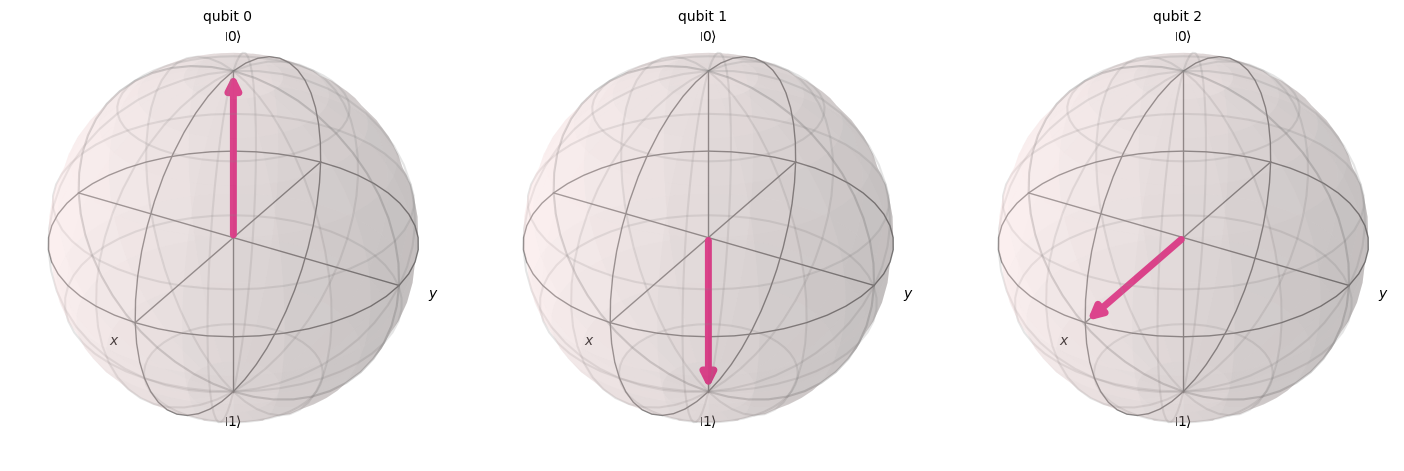

In [37]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    plot_bloch_multivector(final_statevector) #TODO, use plot_bloch_multivector to plot final_state
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

This is how you can check your progress on the Labs

In [38]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1767 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1031 participants have completed this lab
Lab 2: 7/7 exercises completed (100%)
    ✅ 259 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
